In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Description 
train a neural network with sigmoid as activation function neurons and calculate Classification error
- classification layer should be softmax
- loss function should be cross entropy
- test with different architectures

In [2]:
# Define the neural network architecture
def build_model(input_shape, num_classes, activation_function='sigmoid'):
    model = models.Sequential()
    model.add(layers.Flatten(input_shape=input_shape))
    model.add(layers.Dense(128, activation=activation_function))
    model.add(layers.Dense(64, activation=activation_function))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model

In [7]:
# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


In [8]:
# Build the model
input_shape = (28, 28, 1)
num_classes = 10
model = build_model(input_shape, num_classes)

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [9]:
# Train the model
history = model.fit(train_images, train_labels, epochs=10, batch_size=64,
                    validation_data=(test_images, test_labels))


Epoch 1/10
938/938 [==============================] - 4s 4ms/step - loss: 0.6175 - accuracy: 0.8499 - val_loss: 0.2536 - val_accuracy: 0.9304
Epoch 2/10
938/938 [==============================] - 3s 4ms/step - loss: 0.2166 - accuracy: 0.9386 - val_loss: 0.1800 - val_accuracy: 0.9457
Epoch 3/10
938/938 [==============================] - 4s 4ms/step - loss: 0.1552 - accuracy: 0.9552 - val_loss: 0.1379 - val_accuracy: 0.9594
Epoch 4/10
938/938 [==============================] - 3s 4ms/step - loss: 0.1189 - accuracy: 0.9652 - val_loss: 0.1148 - val_accuracy: 0.9661
Epoch 5/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0943 - accuracy: 0.9724 - val_loss: 0.1006 - val_accuracy: 0.9684
Epoch 6/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0768 - accuracy: 0.9779 - val_loss: 0.0966 - val_accuracy: 0.9709
Epoch 7/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0638 - accuracy: 0.9818 - val_loss: 0.0841 - val_accuracy: 0.9736
Epoch 

313/313 [==============================] - 1s 2ms/step - loss: 0.0790 - accuracy: 0.9766
Test Accuracy: 97.66%
Test Loss: 0.07897648215293884


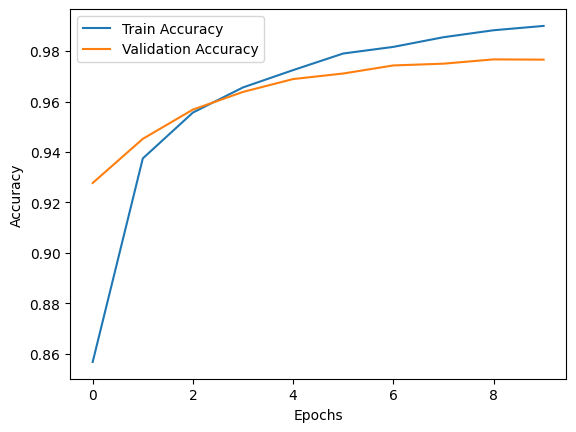

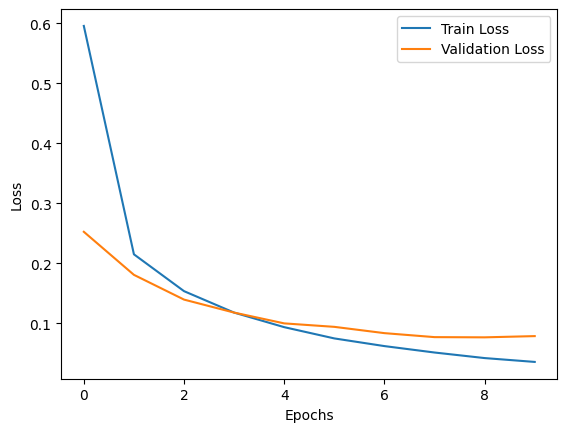

In [6]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test Loss: {test_loss}')

# Optionally, you can visualize the training history

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Learning Curve
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# #Learning Curve precision and recall
# plt.plot(history.history['precision'], label='Train Precision')
# plt.plot(history.history['val_precision'], label='Validation Precision')
# plt.xlabel('Epochs')
# plt.ylabel('Precision')
# plt.legend()
# plt.show()

# plt.plot(history.history['recall'], label='Train Recall')
# plt.plot(history.history['val_recall'], label='Validation Recall')
# plt.xlabel('Epochs')
# plt.ylabel('Recall')
# plt.legend()
# plt.show()

# #Learning Curve F1
# plt.plot(history.history['f1'], label='Train F1')
# plt.plot(history.history['val_f1'], label='Validation F1')
# plt.xlabel('Epochs')
# plt.ylabel('F1')
# plt.legend()
# plt.show()


### now changing sigmoid activation function to relu